In [1]:
#Import all the libraries necessary to this research

#Data Preparation and Analysis
import json
import pandas as pd
import numpy as np

#Data Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams



# NLP Model and Model Analysis
import nltk
from nltk.corpus import stopwords
from keras import metrics
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SpatialDropout1D

# Disable Warnings
from warnings import filterwarnings

In [2]:
filterwarnings('ignore') 

# Part I: Research Question


# A1. RESEARCH QUESTION
Can Sentiment Analysis be employed as a means to predict the emotional tone of users from the content of their reviews?





# 





# A2. OBJECTIVES AND GOALS
The goal of this analysis is to develop a robust predictive model capable of accurately forecasting the sentiments expressed in user reviews with a minimum accuracy of 85%.




# 






# A3. PRESCRIBED NETWORK 

In this Sentiment Analysis experiment, I have chosen the LSTM network, which stands for Long Short-Term Memory networks. LSTM is a type of Deep Learning model extensively utilized in various applications. It falls under the category of Recurrent Neural Networks (RNNs) and excels at learning long-term dependencies, particularly in sequence prediction tasks. 

Unlike conventional RNNs, which can struggle with long sequences, LSTM incorporates unique feedback connections, granting it the exceptional capability to process entire sequences of data. This aspect makes LSTM particularly well-suited for tasks involving sequential data, such as text, speech, and time-series data.

In the field of Sentiment Analysis, the LSTM network shines brightly, allowing us to analyze and understand the emotions and opinions expressed in user reviews and social media posts. Additionally, LSTM's versatility extends to various other domains, including Language modeling, where it excels in predicting and generating text; Machine translation, where it enables accurate language translation; Handwriting recognition, making it adept at interpreting handwritten text; and Image captioning, enabling it to generate descriptive captions for images (Intellipaat, 2022).

Through the remarkable performance and widespread applications of LSTM, it has become a cornerstone of modern Deep Learning and continues to unlock new possibilities in the realm of artificial intelligence.



# 






# B1. DATA EXPLORATION

In [3]:
# Download the nltk stopwords package  
# Reference I1

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
# Import Data
# Reference I2
az_data = pd.read_csv('amazon_cells_labelled.txt', header=None, delimiter = "\t", 
                      names=["Customer Review", "Sentiment Score"])

# Print Head
az_data.head()

,Customer Review,Sentiment Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
# Explore data

az_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Review  1000 non-null   object
 1   Sentiment Score  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Data Preparation 



# Transform to lower case

In this step all review text is converted to lower case. Apart from being essential in the data preprocessing phase, this step 
is also very important in the later steps of the analysis

In [6]:
# Lower Case Conversion
    
az_data['Customer Review'] = az_data['Customer Review'].apply(lambda a: a.lower()) 

In [7]:
#Verify changes
    
az_data.head() 

,Customer Review,Sentiment Score
0,so there is no way for me to plug it in here i...,0
1,"good case, excellent value.",1
2,great for the jawbone.,1
3,tied to charger for conversations lasting more...,0
4,the mic is great.,1


# 



# Presence of unusual characters

In [8]:
# Place all unusual characters in a list 
# Reference I3

review_data = az_data['Customer Review'].tolist()

uc_data = ["".join([a for a in b if not a.isalpha()]) for b in review_data]

In [9]:
# Print list up till 50th index

print(uc_data[:50])

['                    .', ' ,  .', '   .', '        45 . !!', '   .', '                .', '        ,            .', '    ...   !', '  ,    .', '      !.', '     .', '             .', '        5+             .', '   ', '    ,    ""      .', '          .', '      !', '   !.', ' !.', '                .', "   '     ,        .", '            !', '     .', "            '    .", '             .', '   /  .', "'     7       '     ' .", " '         .", '                 .', "'  .", '       ,     .', '            .', '         .', '             .', '                 . ', '    3                .   .', '     .', '   .', '         680.', ' .', '      2,           .', '      .', '   .', '     .', '  .', '      ', '         ?.', '              .', '    .', '  .']


In [10]:
# All unusual chars will be removed

az_data['Customer Review'] = az_data['Customer Review'].str.replace('[^a-zA-Z\s]', '')
az_data.head()

,Customer Review,Sentiment Score
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more...,0
4,the mic is great,1


In [11]:
# Verify whether there are any remaining unusual characters.
# Repeat list step

review_data = az_data['Customer Review'].tolist()
uc_data = ["".join([a for a in b if not a.isalpha()]) for b in review_data]

In [12]:
# Print list up till 50th index

print(uc_data[:50])

['                    ', '   ', '   ', '          ', '   ', '                ', '                    ', '       ', '      ', '      ', '     ', '             ', '                     ', '   ', '              ', '          ', '      ', '   ', ' ', '                ', '                ', '            ', '     ', '                ', '             ', '     ', '                  ', '          ', '                 ', '  ', '            ', '            ', '         ', '             ', '                  ', '                       ', '     ', '   ', '         ', ' ', '                 ', '      ', '   ', '     ', '  ', '      ', '         ', '              ', '    ', '  ']


Apart from commas, the above results indicate that all other unusual characters have been successfully eliminated.

# 









# Vocabulary Size
During the tokenization process in Section B2 below, the vocabulary size is determined to be 1749.

# 





# Proposed Word Embedding Length
By applying the "empirical rule of thumb," a word embedded length of 6 was selected for the analysis. The word embedding represents the total number of dimensions used to represent each word in the embedding space. The choice of this length is based on the fourth rule, which is the consideration of all possibilities for embedding dimensions.

When selecting the dimensions for word embeddings, there is a trade-off between higher and lower dimensions. Higher dimensions can potentially lead to increased accuracy, but they may also result in an overfit model, where the model performs well on the training data but poorly on new data. On the other hand, lower dimensions can help in reducing the risk of overfitting but might sacrifice some level of accuracy in modeling. Hence, it is crucial to strike a balance and choose the word embedded length that best suits the specific task and dataset to achieve optimal performance in sentiment analysis.

In [13]:
# Find the 4th root of Vocab size

length_ = 1749 ** (1.0 / 4)
length_

6.466919462360187

# 






# Statistical Justification for the Chosen Maximum Sequence Length

To determine the appropriate amount of padding, I analyzed the summary statistics of the word count in each Customer Review The average number of words was 34, centered around the 54th percentile, indicating that approximately 46% of reviews contained more words than the mean. The longest review had 91 words. Additionally, I examined the 90th, 95th, and 99th percentiles, which had approxiamtely 72, 78, and 88 words, respectively. To ensure that almost all words are captured during padding, I opted to select the 99th percentile.

In [14]:
# Calculate number, of words

wrds = az_data['Customer Review'].str.split().apply(len).value_counts()

In [15]:
# Run Summary statistics

wrds.describe()

count    29.000000
mean     34.482759
std      25.036574
min       1.000000
25%      16.000000
50%      31.000000
75%      44.000000
max      91.000000
Name: Customer Review, dtype: float64

In [16]:
wrds.quantile(0.54)

33.60000000000001

In [17]:
wrds.quantile(0.9)

72.4

In [18]:
wrds.quantile(0.95)

77.6

In [19]:
wrds.quantile(0.99)

87.91999999999999

# 









# B2. TOKENIZATION

Tokenization is a significant Natural Language Processing (NLP) task that involves breaking down a given text into smaller units called tokens. These tokens can represent complete words, parts of words, or even individual characters, including punctuation marks. It serves as a foundational step in NLP, facilitating various text processing and analysis tasks (Perry, 2021).

Based on the definition above, we can categorize tokenization into three main types: word-level, sub-word-level, and character-level tokenization. For this particular analysis, we will focus on word-level tokenization using the Python Tensorflow library, specifically the tensorflow.keras.preprocessing.text.Tokenizer object. This powerful tool allows us to split a text into distinct words based on a defined delimiter. Each word is then assigned a unique numeric code, which forms the vocabulary for the entire dataset. The Tokenizer dynamically adapts to new words encountered during the process, ensuring a comprehensive representation.

Once the tokenization process is complete, the algorithm proceeds to analyze the clusters of tokens for each review text, identifying and grouping together tokens with similar meanings or contexts. This analysis plays a crucial role in subsequent NLP tasks, enabling sentiment analysis, topic modeling, and other language-based insights.

In [20]:
# Exclude stop words from Customer Review text 
# Reference I4

sw_ = stopwords.words('english')
az_data['Customer Review'] = az_data['Customer Review'].apply(lambda a: ' '.join([w for w in a.split() if w not in (sw_)]))

In [21]:
# The Tokenization Process 
# Reference I5


rv_data = az_data['Customer Review'].values
tk = Tokenizer(num_words=5000)
tk.fit_on_texts(rv_data)


# Vocabulary Size
vc = len(tk.word_index) + 1

# Encoder
enc = tk.texts_to_sequences(rv_data)

In [22]:
# Print Vocabulary Lenth

print(vc)

1749


In [23]:
# Print a review text and its encoded data
    
print(rv_data[11])
print(enc[11])

impressed going original battery extended battery
[97, 154, 182, 8, 439, 8]


# 







# B3. PADDING PROCESS
In the context of neural networks, it is essential for inputs to have consistent shapes and sizes. However, when dealing with text data in an LSTM network, sentences often vary in length, some being longer or shorter than others. To utilize LSTM networks effectively, it is necessary to ensure that all inputs have the same size. This is where the concept of "padding" comes into play.

Padding is a preprocessing technique that involves standardizing the length of sentences by defining a maximum length for each sentence and adjusting their sizes accordingly. For shorter sentences, zeros are added to achieve the desired length, while longer sentences are truncated by dropping extra words beyond the defined length.

In this particular analysis, the padding process is applied with a maximum length of 88 words. Before feeding the text sequences into the LSTM network, sentences will be padded to ensure uniformity and compatibility across all inputs, enabling the model to process the data effectively. By implementing padding, the LSTM network can handle varying-length text inputs and perform sentiment analysis accurately and efficiently.

In [24]:
# Apply padding to sequences.
    
pad = pad_sequences(enc, maxlen=88)

In [25]:
# Print any padded sequence.

print(pad[14])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  85 699  13 246  42]


# 












# B4. CATEGORIES OF SENTIMENT

The data will undergo sentiment classification based on customer reviews' scores, which will be categorized into two types of sentiments:

- 0: Negative
- 1: Positive

In [26]:
# Calculate the total value of each score

az_data['Sentiment Score'].value_counts()

0    500
1    500
Name: Sentiment Score, dtype: int64

In [27]:
# Convert scores to sentiments

az_data['Customer Review'] = az_data['Customer Review'].apply(lambda z: 'Negative Feedback' 
                                                              if z == 0 else 'Positive Feedback')

In [28]:
# Print Head 

az_data['Customer Review'].head()

0    Positive Feedback
1    Positive Feedback
2    Positive Feedback
3    Positive Feedback
4    Positive Feedback
Name: Customer Review, dtype: object

# 





# B5. STEPS TO PREPARE THE DATA

- In Step 1 of the Data Preparation phase (Section B1), the customer review text is transformed to lower case to ensure uniformity in the text data.

- Step 2, also part of the Data Preparation phase in Section B1, involves removing all unusual characters from the text. Non-alphabetic characters are not relevant for the Natural Language Processing (NLP) process. Only line breaks, spaces, and commas are retained.

- Moving to Step 3, during the Tokenization phase in Section B2, all stop words are eliminated. These include prepositions, pronouns, articles, conjunctions, and other words that do not carry significant meaning in the context of sentiment analysis.

- In Step 4, still in the Tokenization phase of Section B2, the remaining text data is tokenized. This process involves breaking down the text into individual words using a specific delimiter. Each word is then assigned a unique numeric encoding, forming the vocabulary for the entire dataset. The vocabulary is stored as an overall vocabulary list.

- Step 5, which is also part of the Tokenization phase in Section B3, focuses on padding the tokenized data. This step ensures that all sentences have the same length. The maximum length for longer texts is set to 88 words, and shorter texts are padded with additional zeros to match this length.

- In Step 6 (Section B4), the scores in the dataset are classified based on their sentiment types. Scores of 0 are labeled as Negative, while scores of 1 are labeled as Positive.

- Step 7 involves splitting the data into predictor and response attributes. This step will be carried out in the subsequent code blocks.

- Finally, in Step 8, the attributes are further divided into training and test sets. This step will also be performed in the upcoming code blocks.

In [29]:
# Independent and Dependent attribute data
# Step 7

y = az_data['Sentiment Score']
X = pad

In [30]:
# Split data into training and testing sets
# Step 8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [31]:
# Print the domension of the arrays

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 88) (250, 88) (750,) (250,)


# 







# B6. PREPARED DATASET

In [32]:
# Export Data Set as an Excel file

az_data.to_excel('amazon_preprocessed_data.xlsx', encoding = 'utf-8', index = False,)

# 























# C1. MODEL SUMMARY


In [33]:
# Develop lstm model 
# Reference I5

lstm = Sequential()
lstm.add(Embedding(vc, round(length_), input_length=X.shape[1]) )
lstm.add(SpatialDropout1D(0.25))
lstm.add(LSTM(22, dropout=0.25, recurrent_dropout=0.25))
lstm.add(Dropout(0.2))
lstm.add(Dense(1,activation='sigmoid'))
lstm.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [34]:
# Print the model's summary

print(lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 88, 6)             10494     
                                                                 
 spatial_dropout1d (Spatial  (None, 88, 6)             0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 22)                2552      
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 dense (Dense)               (None, 1)                 23        
                                                                 
Total params: 13069 (51.05 KB)
Trainable params: 13069 (51.05 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

# 







# C2. NETWORK ARCHITECTURE

The LSTM network in this setup comprises six distinct layers, each serving a specific purpose:

1. The Embedding Layer: As the initial hidden layer, the Embedding layer plays a crucial role in learning embeddings while simultaneously training the deep learning model. It requires three essential parameters: the vocabulary size, sequence length, and the embedding length.

2. The SpatialDropout1d: This layer operates on the input data, dropping entire one-dimensional feature maps instead of individual elements. The parameter utilized here is a decimal representing the dropout rate for the input units.

3. LSTM Layer: As extensively explained in Section A3, this input layer is key for processing sequential data. The LSTM layer involves several parameters, including the dropout rate, the number of nodes (units), and the recurrent dropout rate.

4. The Dropout Layer: Functioning as a mask, this input layer nullifies the contribution of certain neurons to the subsequent layer while leaving others unaffected. The parameter used here is a decimal that determines the dropout rate for the input units.

5. The Dense Layer: Positioned as the final input layer, the Dense layer embodies a traditional fully connected neural network, where each input node is connected to every output node. The parameters applied in this layer are the number of nodes and the activation function.

6. The Output Layer: In the output layer, essential parameters such as the optimizer, loss function, and metric are defined. These parameters are instrumental in generating the desired output of the neural network.

# 



# C3. HYPERPARAMETERS


- Activation Functions: The decision to use the sigmoid function was influenced by the binary nature of the output. Given that the task involves binary classification, the sigmoid activation function is well-suited for mapping the final predictions to probabilities between 0 and 1.

- Number of Nodes per Layer: To accommodate the sigmoid activation function in the dense layer, a single node was selected. As for the LSTM layer, I opted for 22 nodes, which represents a quarter of the number of nodes used in the Embedding Layer. This choice aims to strike a balance between model complexity and capturing relevant patterns in the data.

- Loss Function: The adoption of binary crossentropy as the loss function is a consequence of the binary classification nature of the problem. This particular loss function is well-established for binary classification tasks, facilitating the model's ability to optimize and make accurate predictions.

- Optimizer: For its high efficiency and compatibility with LSTM networks, the Adam optimizer was chosen. Adam is an adaptive learning rate optimization algorithm that effectively updates model weights and helps converge faster during training.

- Stopping Criteria: The stopping criteria for the training process involves monitoring the loss function of the validation set for five consecutive epochs. Once this criterion is met, the training process concludes. The implementation of this stopping criteria can be found in Section D1.

- Evaluation Metric: In this model, the standard evaluation metric used is accuracy. Accuracy is a reliable measure to assess the performance of the model, as it quantifies the percentage of correct predictions compared to the actual labels in the dataset.

# 







# D1. STOPPING CRITERIA

Using an excessive number of epochs during model training can lead to overfitting, causing the model to become overly specialized to the training dataset and perform poorly on unseen data. Conversely, too few epochs may result in an underfit model that fails to capture the underlying patterns in the data. To address these issues, the concept of "early stopping" is employed.

Early stopping is a technique that involves setting a large number of training epochs and continuously monitoring the model's performance on a separate validation dataset. As the training progresses, if the model's performance on the validation dataset ceases to improve or starts to degrade, the training process is halted before completing all the epochs. This helps prevent overfitting and ensures that the model is stopped at the point where it demonstrates the best generalization ability on unseen data (Brownlee, 2018).

In [35]:
# Early Stopping Criteria

stop_ = EarlyStopping(mode='min', monitor='val_loss', patience=5, verbose=1)

The patience parameter was set to five in the above code execution implying that if there is a loss of accuracy in five successive epochs, the process will have to end.

# 







# D2. TRAINING PROCESS

In [36]:
# Model Training 
# Reference I5

trn = lstm.fit(X_train,y_train, validation_split=0.25, batch_size=30, callbacks=[stop_], epochs=100)

Epoch 1/100
19/19 [==============================] - 9s 144ms/step - loss: 0.6930 - accuracy: 0.4964 - val_loss: 0.6927 - val_accuracy: 0.5372
Epoch 2/100
19/19 [==============================] - 2s 106ms/step - loss: 0.6912 - accuracy: 0.6228 - val_loss: 0.6921 - val_accuracy: 0.5532
Epoch 3/100
19/19 [==============================] - 2s 103ms/step - loss: 0.6893 - accuracy: 0.6014 - val_loss: 0.6907 - val_accuracy: 0.5798
Epoch 4/100
19/19 [==============================] - 2s 108ms/step - loss: 0.6845 - accuracy: 0.6637 - val_loss: 0.6872 - val_accuracy: 0.6436
Epoch 5/100
19/19 [==============================] - 2s 111ms/step - loss: 0.6731 - accuracy: 0.7740 - val_loss: 0.6789 - val_accuracy: 0.6277
Epoch 6/100
19/19 [==============================] - 2s 109ms/step - loss: 0.6494 - accuracy: 0.6868 - val_loss: 0.6706 - val_accuracy: 0.5798
Epoch 7/100
19/19 [==============================] - 2s 110ms/step - loss: 0.6155 - accuracy: 0.7794 - val_loss: 0.6424 - val_accuracy: 0.7394

In [37]:
# Model Evaluation

_, acc_train = lstm.evaluate(X_train, y_train, verbose=0)
_, acc_test = lstm.evaluate(X_test, y_test, verbose=0)

print('Training Data Accuracy: {0:.2f}%'.format(acc_train*100))
print('Test Data Accuracy: {0:.2f}%'.format(acc_test*100))

Training Data Accuracy: 92.40%
Test Data Accuracy: 76.80%


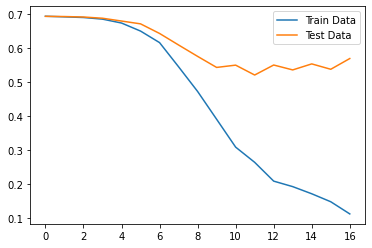

In [38]:
# Visualize model training history

plt.plot(trn.history['loss'], label='Train Data')
plt.plot(trn.history['val_loss'], label='Test Data')
plt.legend()
plt.show()

# 






# D3. FIT

Based on the accuracy results presented in Section D2, there are indications that the model might be overfitting. Specifically, the model achieves an impressive accuracy of around 92.40% on the training data, but the accuracy drops to approximately 76.80% on the test data. Such a significant disparity between training and test accuracies suggests that the model is not generalizing well to unseen data, despite efforts made to prevent overfitting.

In Section D1, a stopping criteria was implemented to prevent overfitting. This criteria allows for the specification of a large number of training epochs but halts the training process if the model's performance does not improve on a hold-out validation dataset. Additionally, both Spatial_Dropout1d and Dropout layers were included in the model architecture. These layers randomly ignore certain nodes during training, preventing the model from relying too heavily on specific nodes and reducing the likelihood of inheriting mistakes from previous nodes.

However, despite these measures, the model's performance on the test data indicates the possibility of overfitting. It is essential to further investigate and fine-tune the model to enhance its generalization capabilities and improve its performance on unseen data.

# 




# D4. PREDICTIVE ACCURACY
The classification report and heatmap below provide insights into the model's predictive accuracy. 

In [39]:
# Acquire predicted test values

y_pred = lstm.predict(X_test).round()

8/8 [==============================] - 1s 16ms/step


In [40]:
# Model's Classification Report

rep = classification_report(y_test,y_pred,labels=[1,0])
print(rep)

              precision    recall  f1-score   support

           1       0.76      0.79      0.77       126
           0       0.78      0.75      0.76       124

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250



<AxesSubplot:>

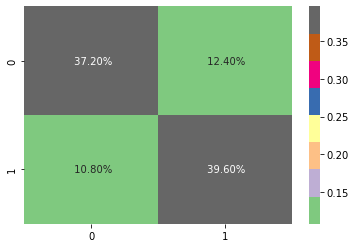

In [41]:
# Confusion matrix

mtrx = confusion_matrix(y_test, y_pred)
sns.heatmap(mtrx/np.sum(mtrx), annot=True, fmt=' .2%', cmap='Accent')

Based on the findings in the above report, we can infer that the model demonstrates reasonably accurate predictions concerning user sentiments. However, my confidence in the model is not very high due to the notable probability of making incorrect predictions.

# 







# E. CODE

In the code blocks above, you can find all the codes used to save the trained neural network within the model.

# 







# F. FUNCTIONALITY
In terms of functionality, this neural network model exhibits both positive and negative aspects. On the negative side, the model's accuracy is a concern, as it tends to achieve very high predictions on the training data but shows a noticeable drop in accuracy on the test data, although it still performs reasonably well. Consequently, a considerable number of reviews may be misclassified with respect to their sentiment.

On the positive side, the model demonstrates remarkable speed during training. This can be attributed to its simple architecture and the relatively small dataset used for this analysis. As a result, the model's training process completes within a few seconds, implying that there are no significant processing costs, and all results are generated promptly.

# 



# G. RECOMMENDATIONS

I would advise Amazon stakeholders to conduct further analysis on this data to develop a more efficient model capable of making nearly perfect predictions on user sentiments. To achieve this, they can explore the following approaches:

1. Hyperparameter Tuning: Experiment with different hyperparameters such as learning rate, batch size, number of epochs, and dropout rates. By systematically varying these parameters, the model's performance can be fine-tuned to achieve better accuracy on both training and test datasets.

2. Cross-Validation: Employ cross-validation techniques to ensure the model's generalization performance. This can help detect overfitting issues and provide a more realistic estimate of the model's accuracy.

# 








# H. REPORTING

This document was produced using the Jupyter Notebook environment, and then converted to and reported in a PDF format.

# 








# I. SOURCES FOR THIRD-PARTY CODE
1: https://stackoverflow.com/questions/41610543/corpora-stopwords-not-found-when-import-nltk-library

2: https://www.geeksforgeeks.org/how-to-read-text-files-with-pandas/

3: https://stackoverflow.com/questions/22520932/python-remove-all-non-alphabet-chars-from-string

4: https://stackabuse.com/removing-stop-words-from-strings-in-python/

5: https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/

# 








# J. SOURCES
1: Intellipaat (2022, February 5). What is LSTM? Introduction to Long Short Term Memory. Retrieved July 22 2023 at  https://intellipaat.com/blog/what-is-lstm/

2: Perry T (2021,  February 1). What is Tokenization in Natural Language Processing (NLP)?. Retrieved July 22 2023 at https://www.machinelearningplus.com/nlp/what-is-tokenization-in-natural-language-processing/

3: Brownlee J (2018, December 10). Use Early Stopping to Halt the Training of Neural Networks At the Right Time. Retrieved July 22 2023 at https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/